In [2]:
import geopandas as gpd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
import seaborn as sns
import pandas as pd
import unidecode
import re
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
from matplotlib.lines import Line2D
from matplotlib.patches import Patch
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
import matplotlib.image as image
sns.set_style("whitegrid")

## Load GEOJSON FILE

In [5]:
cpath = 'data/map/base/merge_commune.json'
cmap = gpd.read_file(cpath)
dpath = 'data/map/base/district.json'
dmap = gpd.read_file(dpath)

## Visualize the map

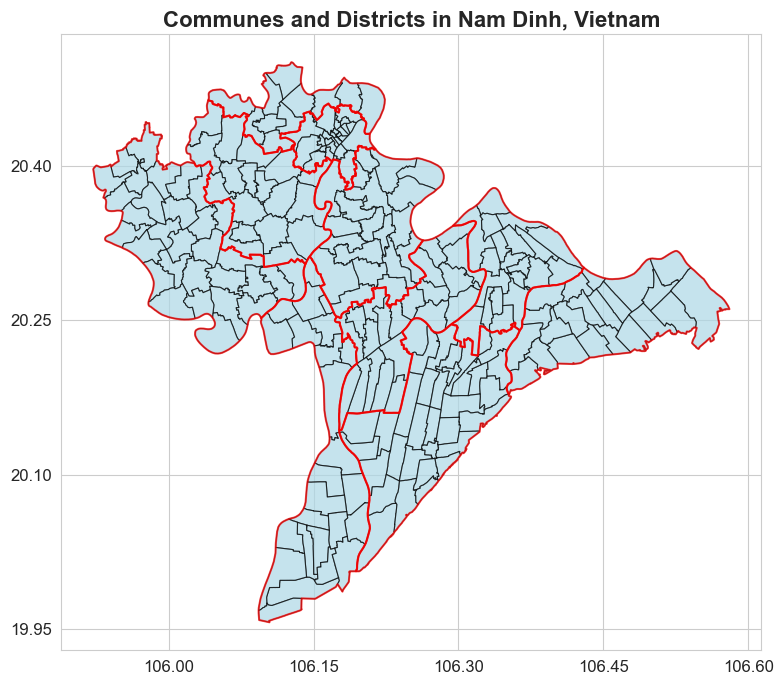

In [6]:
# Create a larger figure for better readability
fig, ax = plt.subplots(1, 1, figsize=(12, 8))

# Plotting communes with boundaries
cmap.plot(ax=ax, color='lightblue', edgecolor='black', linewidth=0.8, alpha=0.7)

# Plotting districts with boundaries
dmap.plot(ax=ax, color='none', edgecolor='red', linewidth=1.5, alpha=0.7)

# Enhancing the plot for publication quality
ax.set_title('Communes and Districts in Nam Dinh, Vietnam', fontsize=16, fontweight='bold')
ax.tick_params(axis='both', which='major', labelsize=12)
ax.xaxis.set_major_locator(ticker.MaxNLocator(nbins=5))
ax.yaxis.set_major_locator(ticker.MaxNLocator(nbins=5))

# Show the plot
plt.show()

## Merging District

### Read Excel file

In [ ]:
dt = pd.read_excel('data/namdinh/nd_huyen.xlsx')


In [ ]:
dt = dt.dropna(axis=1, how='all')  # Drop columns with all NaN values
dt = dt.dropna(axis=0, how='all')  # Drop rows with all NaN values

# Renaming columns based on the actual data structure
# The number of column names should match the number of columns in the DataFrame
column_names = dt.columns[:len(dt.columns)]  # Adjusting to the correct number of columns
dt.columns = column_names
dt.columns = ['CODE', 'NAME_2']
dt['NAME_2'] = dt['NAME_2'].str.replace('Thành phố', '').str.replace('Huyện','').str.replace(' ','')
merged_gdf = dmap.merge(dt, left_on='NAME_2', right_on='NAME_2', how='left')

### Visualize the map of district

In [ ]:
merged_gdf.to_file('data/namdinh/merge_district.json', driver='GeoJSON') ## Save to GeoJson

## Merging communes

In [ ]:
cm = pd.read_excel('data/namdinh/nd_xa.xlsx')
cm = cm.rename(columns={
    'Mã QH': 'CODE',
    'Phường Xã': 'NAME_3',
    'Mã PX': 'cCODE',
    'Cấp': 'TYPE_3'
})
cm['NAME_3'] = cm['NAME_3'].str.replace(' ','').str.replace('Xã','').str.replace('Thịtrấn','').str.replace('Phường','')

In [ ]:
cmap_with_dcode = cmap.merge(dt, on='NAME_2', how='left')

In [ ]:
# def remove_vietnamese_accent(text):
#     """
#     Remove Vietnamese accents from a string.
#     :param text: String containing Vietnamese text.
#     :return: String with Vietnamese accents removed.
#     """
#     return unidecode.unidecode(text)

# def rearrange_string(s):
#     match = re.search(r'\((Phuong)\)', s)
#     if match:
#         # Extracting the word inside parentheses and adding it to the beginning of the string
#         word = match.group(1)
#         new_string = word + re.sub(r'\(.*?\)', '', s)
#         return new_string
#     else:
#         return s


In [ ]:
# cmap_new = cmap_with_dcode.copy()
# cmap_new['CNAME'] = cmap_new.apply(
#     lambda row: row['TYPE_3'] +  row['NAME_3'] if row['TYPE_3'] == 'Xã' else row['NAME_3'],
#     axis=1 
# )
# #cmap_new['CNAME'] = cmap_new['CNAME'].str.replace(r'\(.*?\)','', regex=True)
# # cmap_new['CNAME'] = cmap_new['CNAME'].apply(remove_vietnamese_accent)
# cmap_new['CNAME']= cmap_new['CNAME'].apply(rearrange_string)


In [ ]:
# cm['CNAME'] = cm['NAME_3'].str.replace(' ','')
# cm['CNAME'] = cm.apply(
#     lambda row: row['TYPE_3'] +  row['NAME_3'] if row['TYPE_3'] == 'Xã' else row['NAME_3'],
#     axis=1
# )
# cm['CNAME']=cm['CNAME'].apply(remove_vietnamese_accent)

In [ ]:
# cmap_final = cmap_new.merge(cm, on=['CODE','CNAME'], how='left')

In [ ]:
# cmap_final.to_file('data/namdinh/merge_commune.json', driver='GeoJSON') ## Save to GeoJson
# cmap_final[cmap_final.duplicated('CNAME')]

In [ ]:
# gdf_proj = cmap_final.to_crs(epsg=32648)
# gdf_proj['area'] = gdf_proj.area


In [ ]:
# gdf_proj.to_file('data/namdinh/merge_commune_36248.json', driver='GeoJSON') ## Save to GeoJson

In [ ]:
# final_gdf = gdf_proj.to_crs(cmap_final.crs)

In [ ]:
# country = gpd.read_file('data/map/vietnam.json')
# country['is_namdinh'] = country['VARNAME_1'] == 'NamDinh'

In [ ]:
# final_gdf